In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import datetime
from zoneinfo import ZoneInfo

import sys
sys.path.append('../')
import naa

In [2]:
run_dir = '.'
directories = {}
directories['Na22_1']  = f'{run_dir}/DAQ/Na22_7_33uCi_2May2016_20241213_4in/UNFILTERED'
directories['Cs137_1'] = f'{run_dir}/DAQ/Cs137_4_66uCi_19Mar2014_20241213_4in/UNFILTERED'
directories['Co60_1']  = f'{run_dir}/DAQ/Co60_0_872uCi_19Mar2014_20241213_4in/UNFILTERED'
directories['Mn54']  = f'{run_dir}/DAQ/Mn54_6_27uCi_2May2016_20241213_4in/UNFILTERED'

directories['Zirconium'] = f'{run_dir}/DAQ/Zirconium_20241213_2155_4in/UNFILTERED'
directories['Niobium'] = f'{run_dir}/DAQ/Niobium4_20241214_1329_4in/UNFILTERED'
directories['Background'] = f'{run_dir}/DAQ/Background_20241215_1800_4in/UNFILTERED'

In [3]:
# decay_lines = {'Ba133':{'energy':[80.9979, 276.3989, 302.8508, 356.0129, 383.8485],
#                          'intensity':[0.329, 0.0716, 0.1834, 0.6205, 0.0894],
#                          'half_life':[10.551*365.25*24*3600]},
#                 'Co60':{'energy':[1173.228, 1332.492],
#                         'intensity':[0.9985, 0.999826],
#                         'half_life':[1925.28*24*3600]},
#                 'Na22':{'energy':[511, 1274.537],
#                         'intensity':[1.80, 0.9994],
#                         'half_life':[2.6018*365.25*24*3600]},
#                 'Cs137':{'energy':[661.657],
#                          'intensity':[0.851],
#                          'half_life':[30.08*365.25*24*3600]},
#                 'Mn54':{'energy':[834.848],
#                         'intensity':[0.99976],
#                         'half_life':[312.20*24*3600]}}
decay_lines = {
                # 'Ba133':{'energy':[356.0129],
                #          'intensity':[0.6205],
                #          'half_life':[10.551*365.25*24*3600],
                #          'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':1 * 3.7e4},
                'Co60_1':{'energy':[1173.228, 1332.492],
                        'intensity':[0.9985, 0.999826],
                        'half_life':[1925.28*24*3600],
                        'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':0.872 * 3.7e4},
                # 'Zirconium':{'energy':[909.15], 
                #              'intensity':[0.9904],
                #              'half_life':[78.41 * 3600]},
                # 'Co60_2':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 2, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                # 'Co60_3':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                # 'Na22_1':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 5 * 3.7e4},
                'Na22_1':{'energy':[511, 1274.537],
                        'intensity':[1.80, 0.899],
                        'half_life':[2.6018*365.25*24*3600],
                        'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity': 7.33 * 3.7e4},
                # 'Na22_3':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 9.98 * 3.7e4},
                'Cs137_1':{'energy':[661.657],
                         'intensity':[0.851],
                         'half_life':[30.08*365.25*24*3600],
                         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                         'activity':4.66 * 3.7e4},
                # 'Cs137_2':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':5.0 * 3.7e4},
                # 'Cs137_3':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':9.38 * 3.7e4},
                'Mn54':{'energy':[834.848],
                        'intensity':[0.99976],
                        'half_life':[312.20*24*3600],
                        'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':6.27 * 3.7e4}}

In [4]:
counts = naa.get_compass_counts(directories, savefile=f'{run_dir}/counts.pkl')

In [5]:
counts = naa.subtract_background(counts, directories['Background'], savefile=f'{run_dir}/counts_bkg_sub.pkl')

In [6]:
default_peak_inputs = {'Na22':{'height_factor':0.30, 'prom_factor':0.30, 'width':[10, 200], 'start_index':300},
               'Cs137':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Co60':{'height_factor':0.6,'prom_factor':0.2, 'width':[20, 200], 'start_index':400},
               'Mn54':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Ba133':{'height_factor':0.01,'prom_factor':0.1, 'width':[10, 200], 'start_index':100},
               'Zirconium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 100], 'start_index':100},
               'Niobium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Background':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100}}
peak_inputs = {}
peak_input_keys = default_peak_inputs.keys()
for sample in counts.keys():
    for pikey in peak_input_keys:
        if pikey in sample:
            peak_inputs[sample] = default_peak_inputs[pikey]
print(peak_inputs)

    


{'Na22_1': {'height_factor': 0.3, 'prom_factor': 0.3, 'width': [10, 200], 'start_index': 300}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Zirconium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 100], 'start_index': 100}, 'Niobium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Background': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}}


# NaI Detector Energy Calibration

543
643
Na22: searched prominence: 1362.0  : [1318] {'peak_heights': array([2724.]), 'prominences': array([2655.]), 'left_bases': array([556]), 'right_bases': array([1426]), 'widths': array([78.24506803]), 'width_heights': array([1396.5]), 'left_ips': array([636.425]), 'right_ips': array([714.67006803])}
Na22_1 [543, 1318]
Na22_1 5 [543, 1318]
678
778
Na22: searched prominence: 903.0  : [1629] {'peak_heights': array([1806.]), 'prominences': array([1740.]), 'left_bases': array([658]), 'right_bases': array([1825]), 'widths': array([105.6104952]), 'width_heights': array([936.]), 'left_ips': array([800.26829268]), 'right_ips': array([905.87878788])}
Na22_1 [678, 1629]
Na22_1 4 [678, 1629]
Cs137_1 [870]
Cs137_1 4 [870]
Cs137_1 [698]
Cs137_1 5 [698]
Co60_1 [1501 1686]
Co60_1 4 [1501 1686]
Co60_1 [1209 1370]
Co60_1 5 [1209 1370]
Mn54 [1086]
Mn54 4 [1086]
Mn54 [869]
Mn54 5 [869]
Zirconium [541 943]
Zirconium 5 [541 943]
Zirconium [ 676 1165]
Zirconium 4 [ 676 1165]
Niobium [977]
Niobium 5 [977

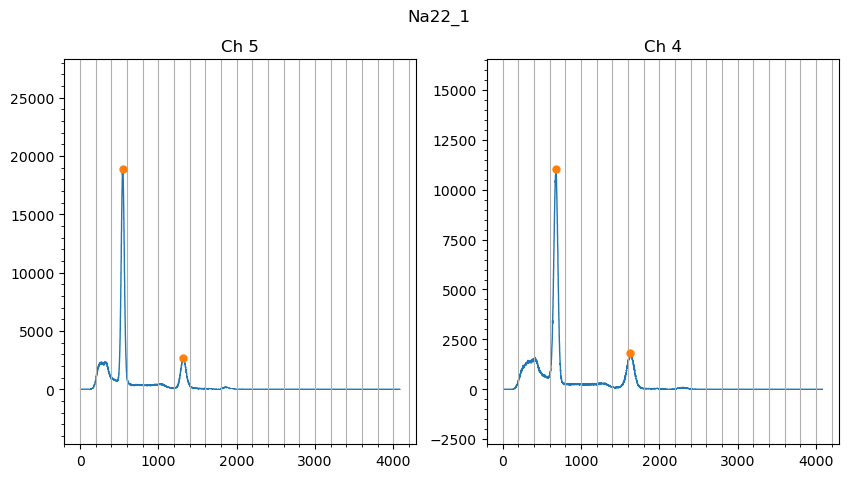

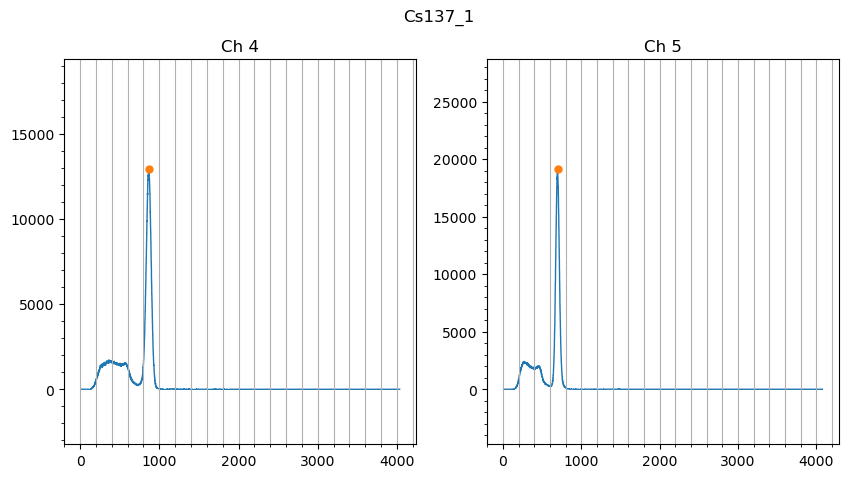

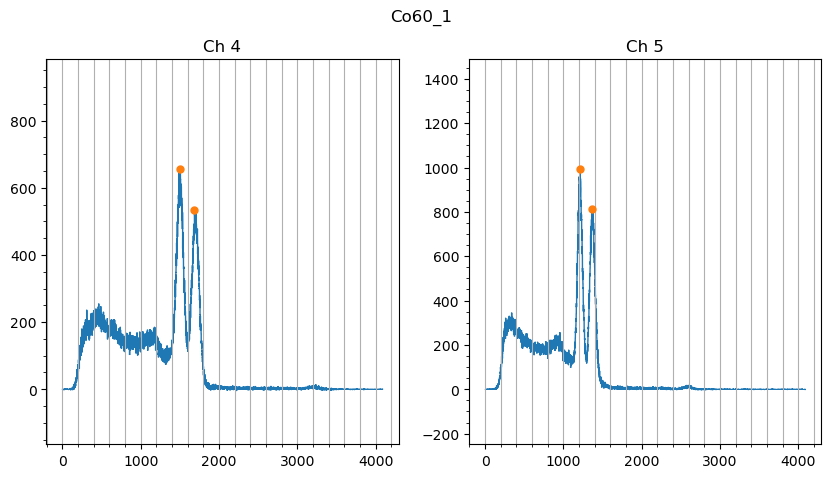

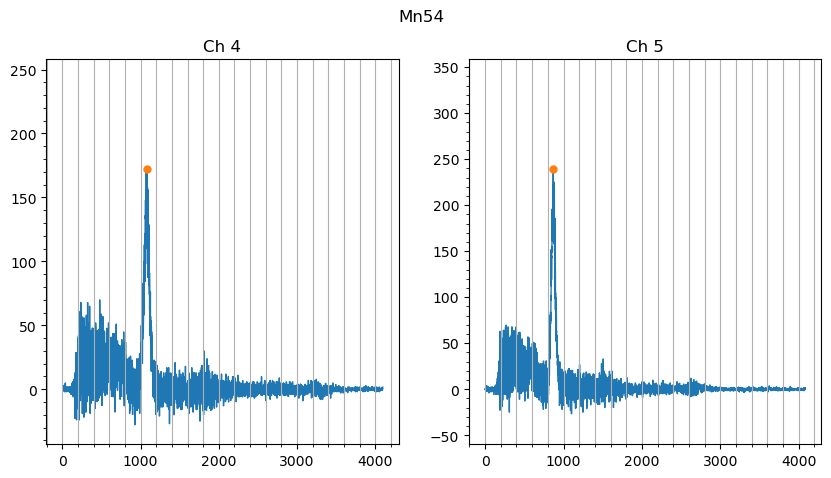

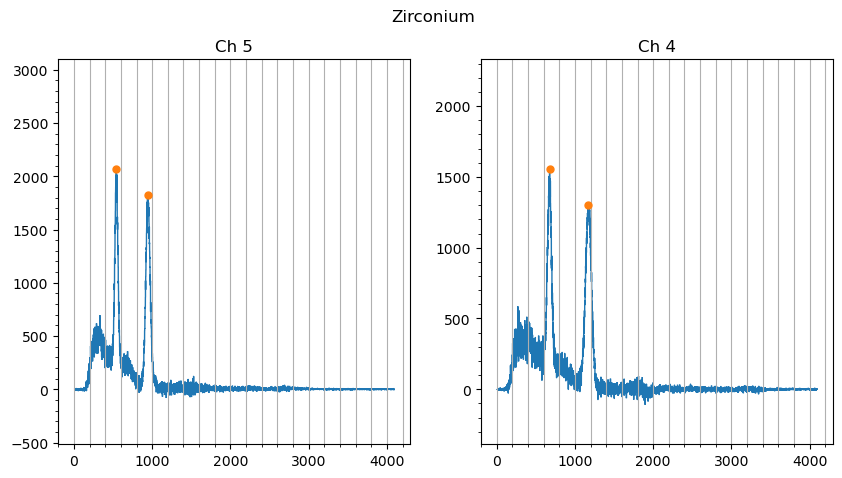

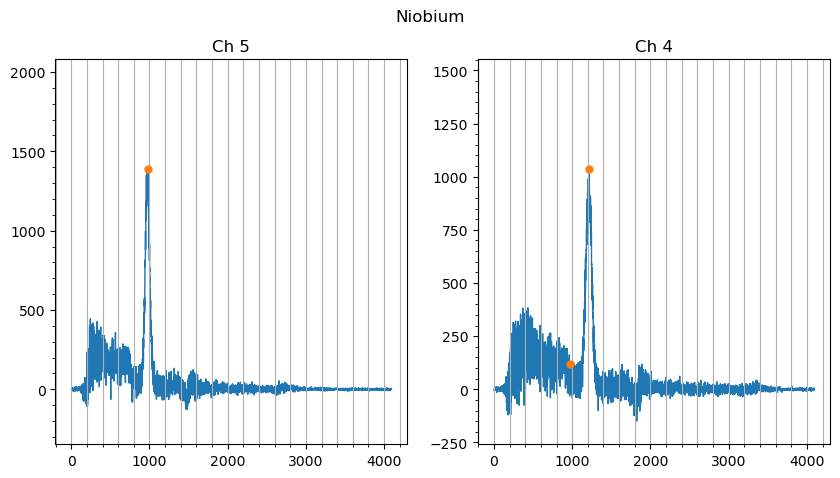

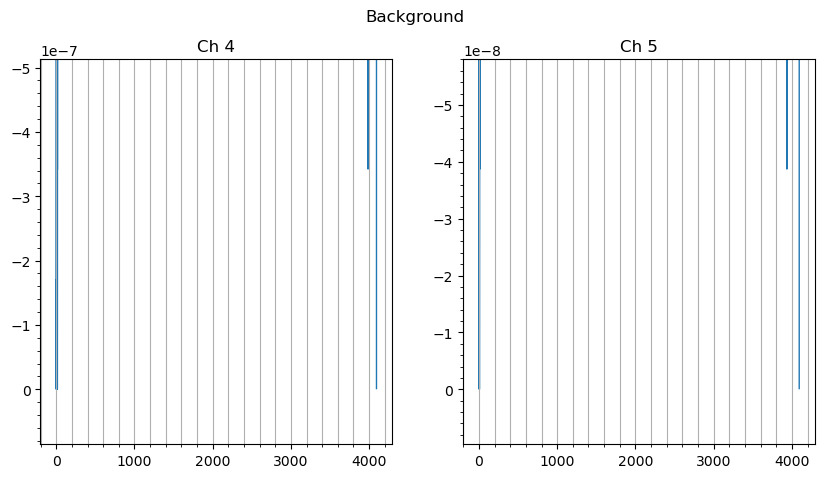

In [7]:

for sample in counts.keys():
    fig, ax = plt.subplots(nrows=1, ncols=len(counts[sample].keys()), figsize=[10, 5])
    for i,ch in enumerate(counts[sample].keys()):
        # peaks, peak_data = find_peaks(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:],
        #                               height=peak_inputs[sample]['height_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               prominence=peak_inputs[sample]['prom_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               width=peak_inputs[sample]['width'])
        ax[i].stairs(counts[sample][ch]['hist'], counts[sample][ch]['bin_edges'])
        peaks = naa.get_peaks(counts[sample][ch]['hist'], sample)
        print(sample, ch, peaks)
        ax[i].plot(peaks, counts[sample][ch]['hist'][peaks], '.', ms=10)
        ax[i].set_title('Ch {}'.format(ch))
        # ax[i].set_yscale('log')
        ax[i].minorticks_on()
        ax[i].xaxis.grid(which='both')
        y_max = np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:])
        ax[i].set_ylim(-y_max*0.25, y_max*1.5)
        if sample=='Co60_3' and ch==2:
            ax[i].set_xlim(1500, 2100)
    fig.suptitle(sample)

{'Na22_1': {'height_factor': 0.3, 'prom_factor': 0.3, 'width': [10, 200], 'start_index': 300}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Zirconium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 100], 'start_index': 100}, 'Niobium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Background': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}}
Co60_1 [1209 1370]
5 Co60_1 [1209 1370]
543
643
Na22: searched prominence: 1362.0  : [1318] {'peak_heights': array([2724.]), 'prominences': array([2655.]), 'left_bases': array([556]), 'right_bases': array([1426]), 'widths': array([78.24506803]), 'width_heights': array([1396.5]), 'left_ips': array([636.425]), 'right_ip

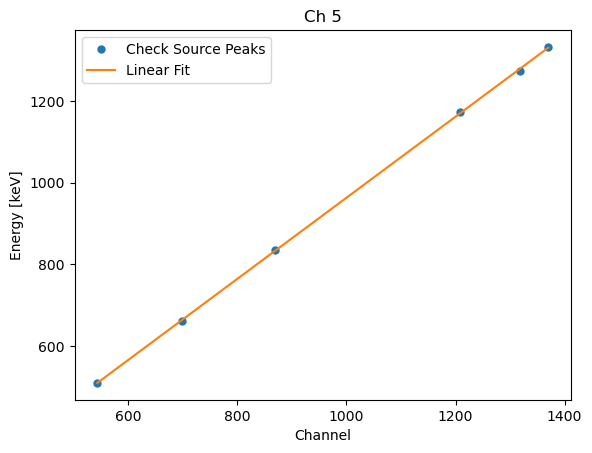

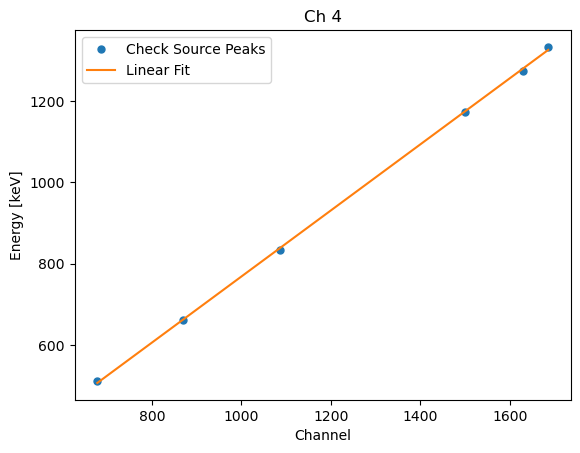

In [8]:
counts, coeff = naa.calibrate_counts(counts, peak_inputs=peak_inputs, decay_lines=decay_lines, plot_calibration=True)

# NaI Detector Efficiency Measurement

In [9]:
# decay_lines['Ba133']['energy'] = [276.3989, 302.8508, 356.0129, 383.8485]
# decay_lines['Ba133']['intensity'] = [0.0716, 0.1834, 0.6205, 0.0894]


# for source in decay_lines.keys():
#     for ch in counts[source].keys():
#         print(source, ch, decay_lines[source]['energy'])
#         naa.get_peak_areas(counts[source][ch]['hist'],
#                             counts[source][ch]['calibrated_bin_edges'],
#                             decay_lines[source]['energy'],
#                             overlap_width=200,
#                             search_width=500,
#                             plot=True)
#         if source=='Zirconium':
#             plt.title('Zirconium Foil Gamma Spectrum')
#             plt.xlim(0, 1500)

Let's look at the effect of adding half the counts from the "sum" peak to each individual photopeak on the efficiency curve. 

The "sum" peak is an extra peak that is located at approximately the sum of the major photo peak energies. I suspect this is due to two different energy peaks occuring at nearly identical times in the detector, or at least faster than the detector and digitizer's time resolution, thus being counted as a single, big energy peak. 

Also notice that the Ch. 4 Mn-54 835 keV peak efficiency is higher than that of the Cs-137 662 keV peak efficiency, which is normally not the case, so I don't really trust that data point. Perhaps we should rely on Ch. 5 counts to get the neutron flux from the Niobium and Zirconium foils.

Cs137_1  Ch  4
[(661.657,)]
[783313.3443062596]
Peak areas:  [783313.3443062596]
Activity measured:  [2529.83351123]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.0187921]
Cs137_1  Ch  5
[(661.657,)]
[1046707.7457588431]
Peak areas:  [1046707.7457588431]
Activity measured:  [3381.30633721]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.025117]
Co60_1  Ch  4
[(1173.228, 1332.492)]
[46934.7333817392, 43561.14405204196]
Peak areas:  [46934.7333817392, 43561.14405204196]
Activity measured:  [79.47189417 73.66176646]
decay constant:  [4.16694549e-09]
count time:  338894078.934
Activity expected:  [7860.09665891]
efficiency:  [0.0101108  0.00937161]
Co60_1  Ch  5
[(1173.228, 1332.492)]
[63054.16485291003, 59167.439312981674]
Peak areas:  [63054.16485291003, 59167.439312981674]
Activity measured:  [106.76347659 100.04959769]
decay constant:  [4.16694549e-09]

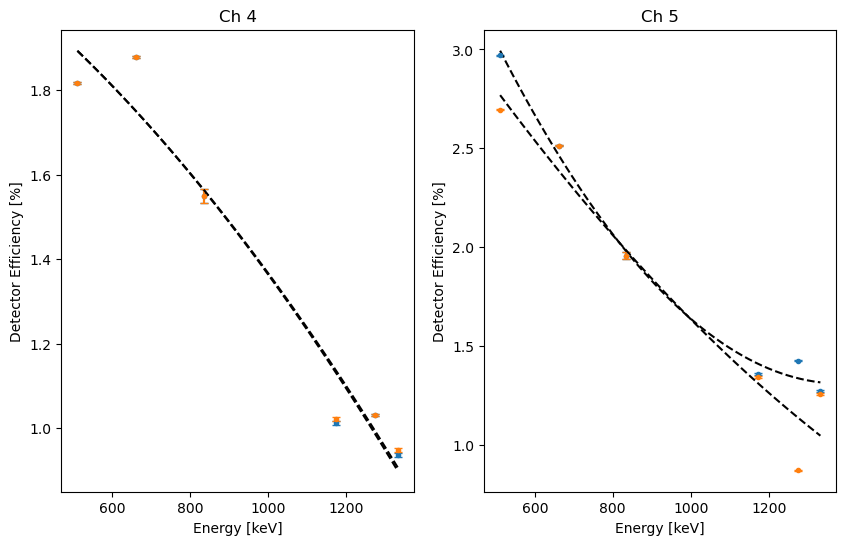

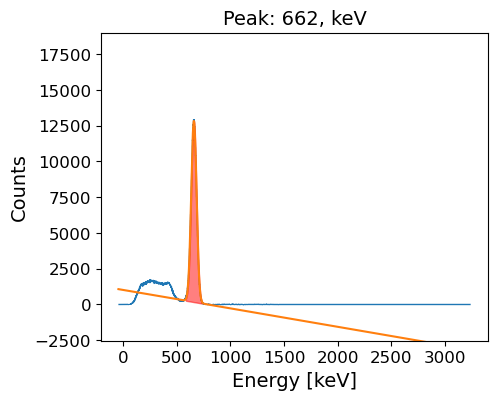

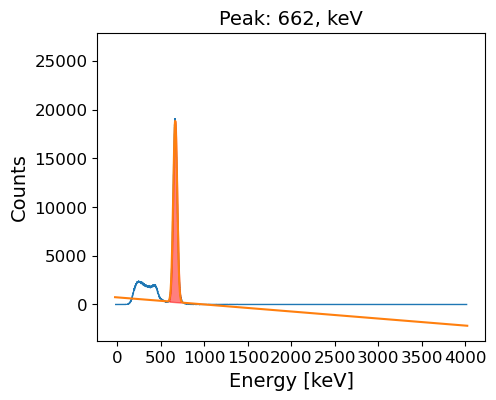

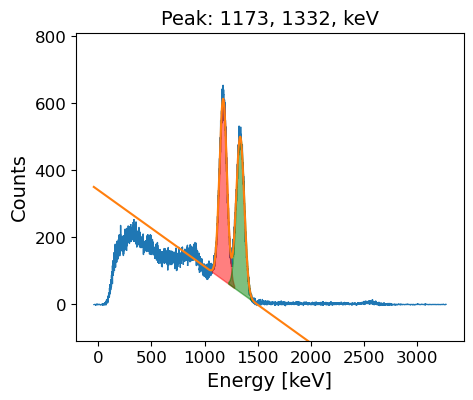

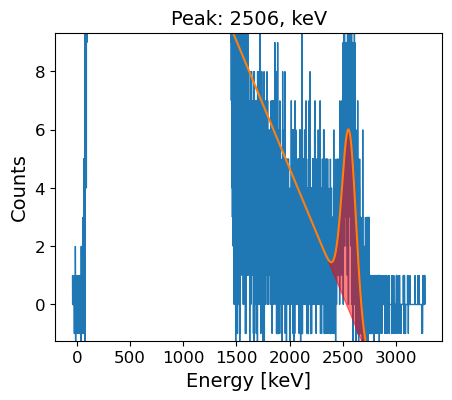

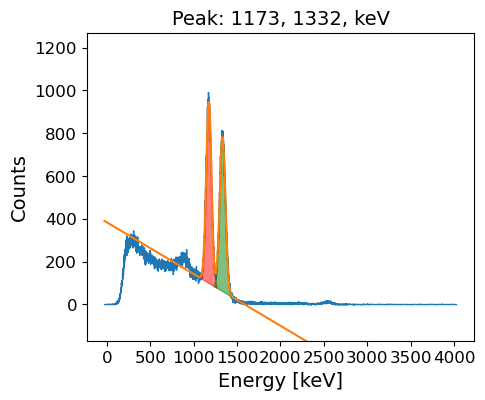

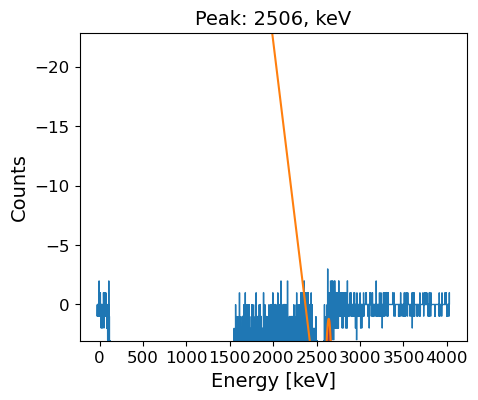

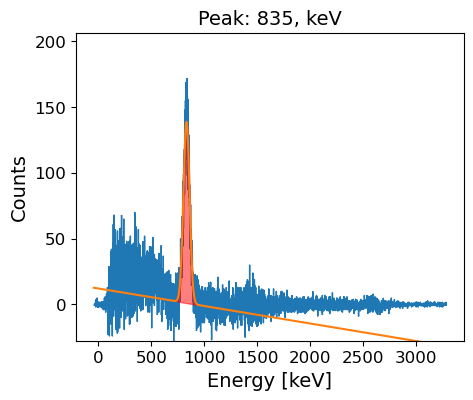

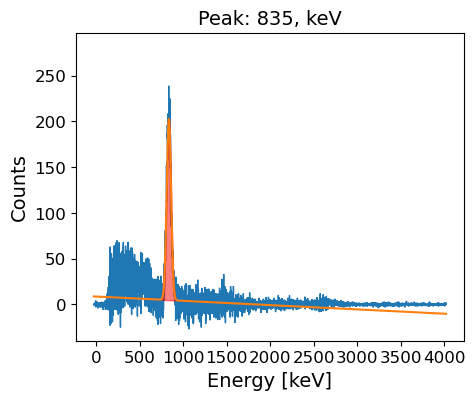

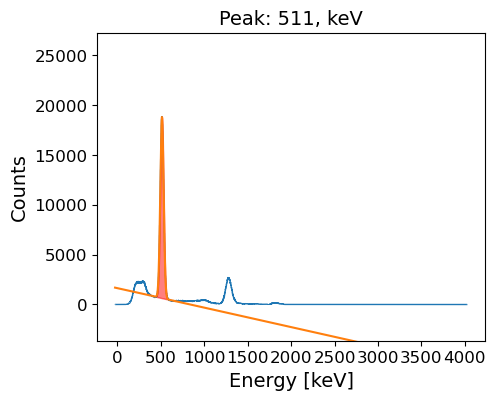

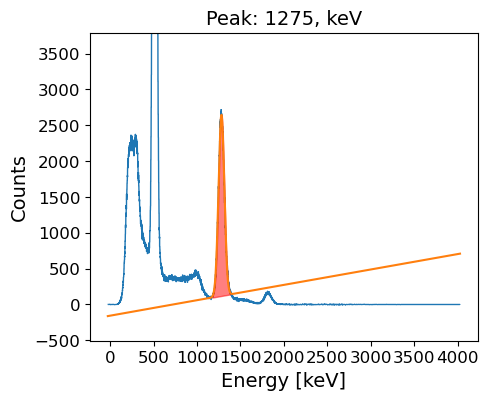

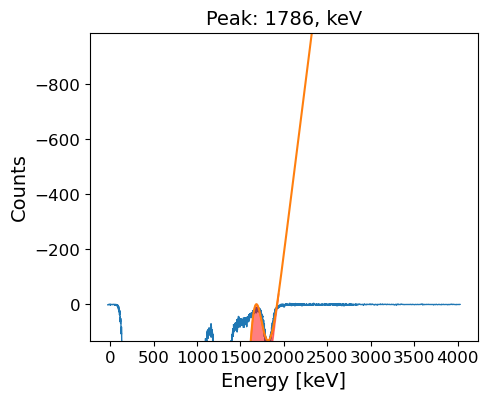

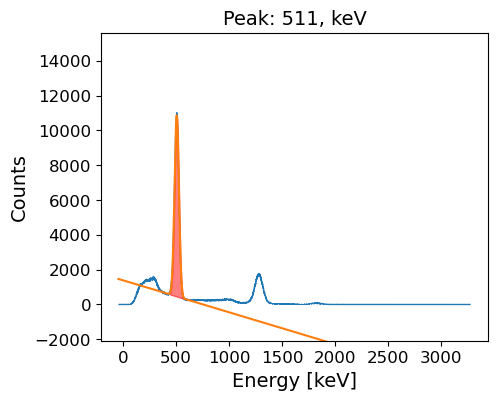

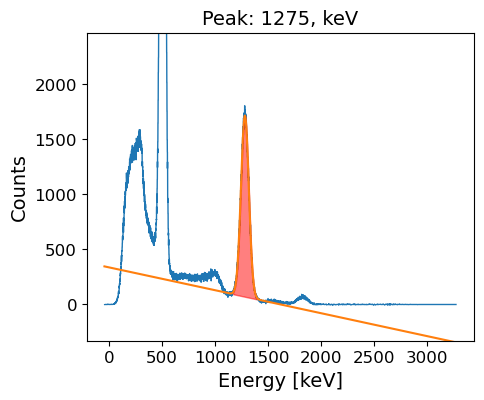

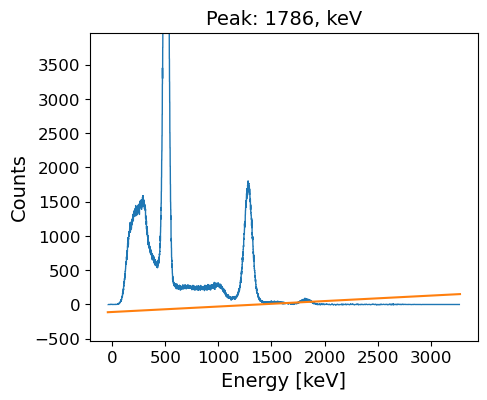

In [10]:
nuclides = [ 'Cs137_1',
             'Co60_1', 
            'Mn54',
            'Na22_1']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,6])
effs, eff_errs, eff_coeff, bounds = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=False,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=False, ax_eff=ax)
effs, eff_errs, eff_coeff, bounds = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=True,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=True, ax_eff=ax)

Cs137_1  Ch  4
[(661.657,)]
Plot gauss params: [1822.2878855741906, -2.243716684812353, 12546.045473770868, 659.9942181161665, 24.25571997704719]
[760574.3283658929]
Peak areas:  [760574.3283658929]
Activity measured:  [2456.39428674]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.01824658]
Cs137_1  Ch  5
[(661.657,)]
Plot gauss params: [2321.9715199063244, -2.812503263281916, 18444.66790172539, 663.6478782448753, 22.17241973350475]
[1022093.561456522]
Peak areas:  [1022093.561456522]
Activity measured:  [3301.79216747]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.02452636]
Co60_1  Ch  4
[(1173.228, 1332.492)]
Plot gauss params: [317.17929989139554, -0.20604805275928892, 538.6243615961222, 1175.2509209907807, 34.690976932560005]
Plot gauss params: [317.17929989139554, -0.20604805275928892, 459.8300181762364, 1335.7391373160294, 37.02365044309434]
[46

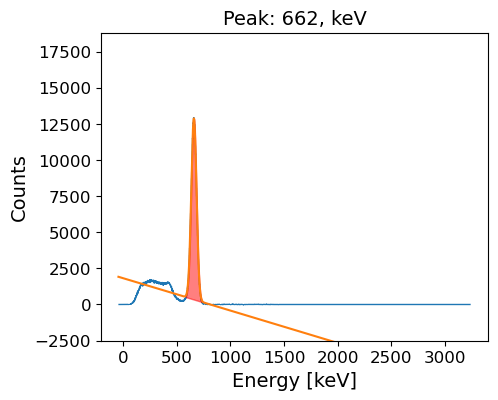

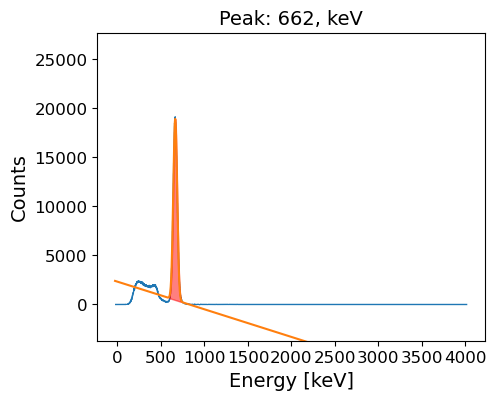

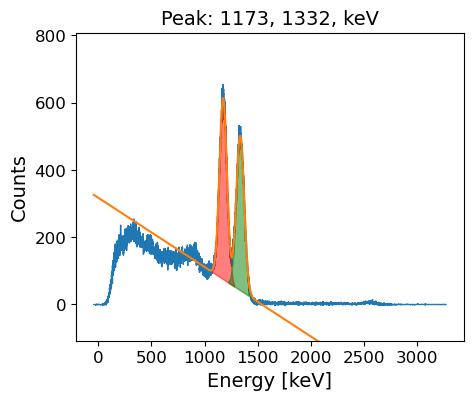

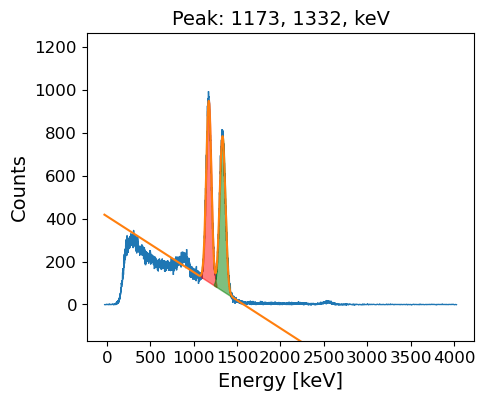

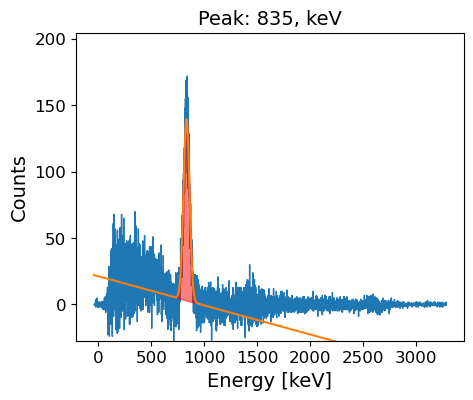

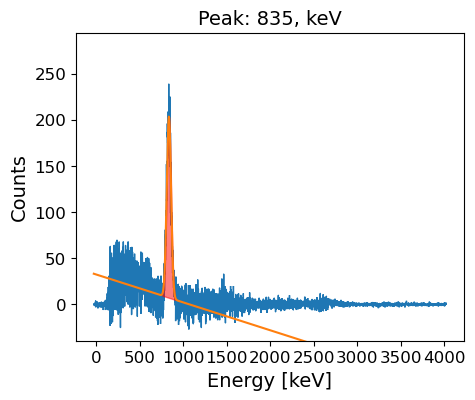

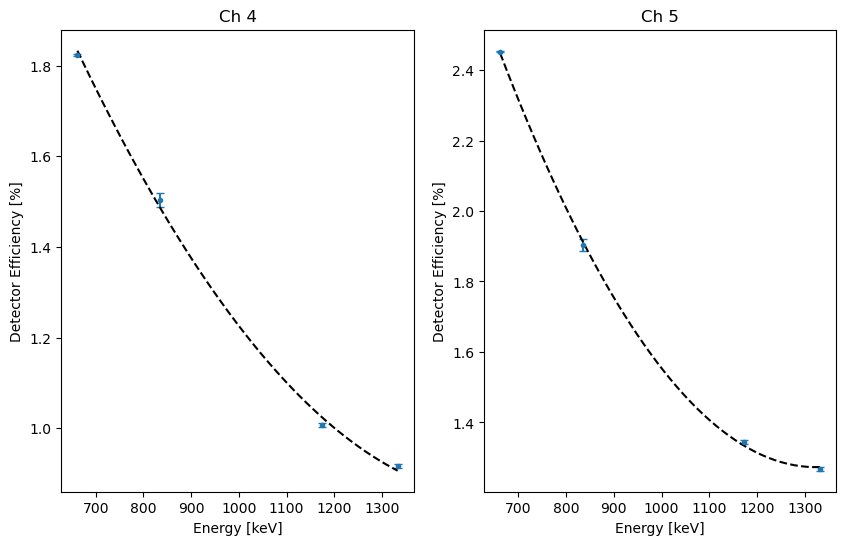

In [11]:
## Not using the "sum" peak for efficiency, which are the efficiency coefficients
# that will be used to calculate the neutron fluences on the Zirconium and Niobium foils

# Also omitting Na22, even though that means the Zirconium 511 keV peak won't be able to be 
# used to calculate foil efficiency without extrapolating the efficiency curve
nuclides = [ 'Cs137_1',
             'Co60_1', 
            'Mn54', 
            # 'Na22_1'
            ]
effs, eff_errs, eff_coeff, bounds = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=True,
                      overlap_width=200, search_width=500,
                      degree=2)

Text(0.5, 1.0, 'Niobium Ch 4')

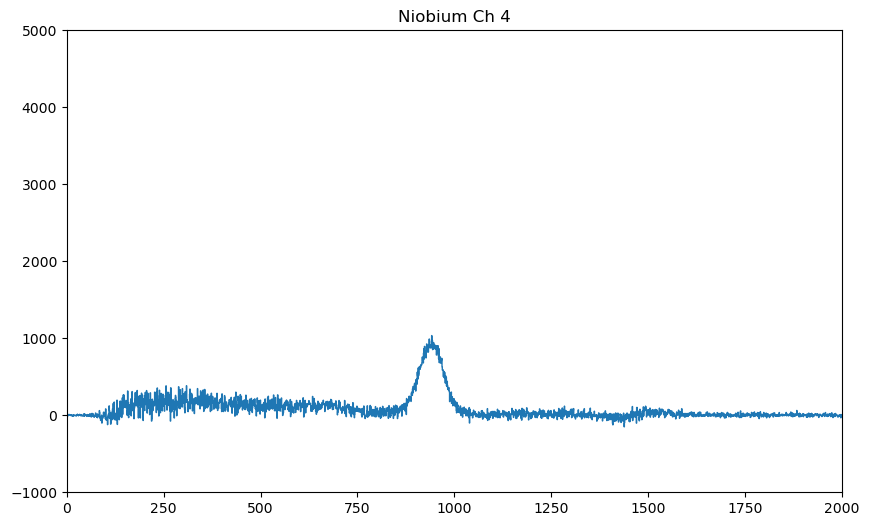

In [12]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Niobium'][4]['hist'], counts['Niobium'][4]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 5e3)
ax.set_title('Niobium Ch 4')


Text(0.5, 1.0, 'Zirconium Ch 4')

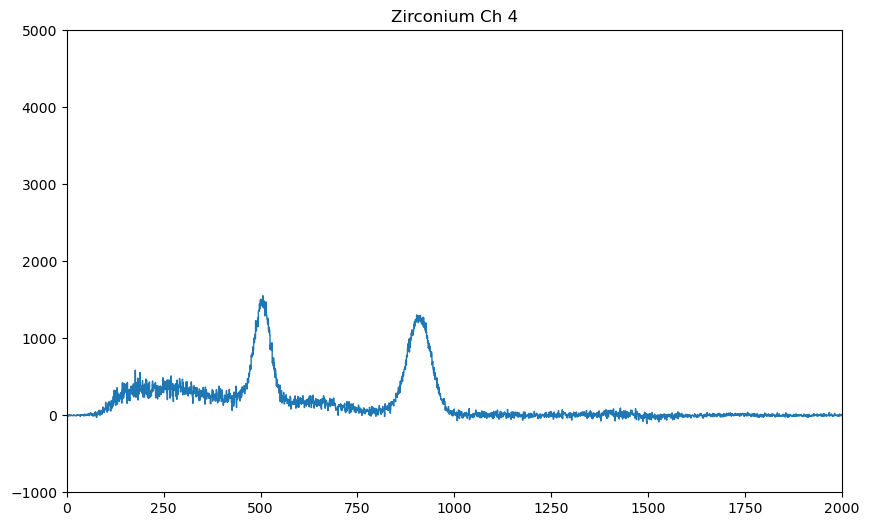

In [13]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Zirconium'][4]['hist'], counts['Zirconium'][4]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 5e3)
ax.set_title('Zirconium Ch 4')

In [14]:
import settings
from settings import ureg
import explicit
import foils
print(settings.ureg)

# Nioboum Foil P383 Rate Measurement

Efficiency calculation based on Equation 1 from:

Lee, Dongwon, et al. "Determination of the Deuterium-Tritium (D-T) Generator Neutron Flux using Multi-foil Neutron Activation Analysis Method." , May. 2019. https://doi.org/10.2172/1524045

## BIG WARNING
This Niobium foil was irradiated about a month before this count took place, only about three half-lives before the next irradiation, so fluences will also account for lingering fluences from that run.

**NEED to do foil analysis on previous run and subtract out fluence contribution.**

In [15]:
nb = foils.Niobium(mass=0.5467 * ureg.g,
                   thickness=0.01 * 2 * ureg.inch,
                   name='Nb4')

flux = {}
mean_flux = 0 / ureg.s

for ch in counts['Niobium'].keys():
        experiment = foils.Experiment(time_generator_off="12/10/2024 21:54:00",
                                      start_time_counting=counts['Niobium'][ch]['start_time'],
                                      distance_from_center_of_target_plane=5.08 * ureg.cm,
                                      real_count_time=counts['Niobium'][ch]['real_count_time'] * ureg.second,
                                      live_count_time=counts['Niobium'][ch]['live_count_time'] * ureg.second,
                                      generator= "P383",
                                      run=2)
        # experiment = {
        #         "foil_name": f"Nb_Ch{ch}",
        #         "generator": "P383",
        #         "run": 2,
        #         "time_generator_off": datetime.datetime(2024, 12, 10, 21, 54, 0, 0, ZoneInfo('America/New_York')),
        #         "start_time_counting": counts['Niobium'][ch]['start_time'],
        #         "real_count_time": counts['Niobium'][ch]['real_count_time'] * ureg.second,
        #         "live_count_time": counts['Niobium'][ch]['live_count_time'] * ureg.second,
        #         "distance_from_center_of_target_plane": 5.08 * ureg.cm,
        #         "total_eff_coeff": eff_coeff[ch],
        #         "efficiency_bounds": np.array(bounds[ch]) * ureg.keV
        # }
        irradiations = [
                {"t_on": 0, "t_off": 12 * ureg.h},
                {"t_on": 24 * ureg.h, "t_off": 36 * ureg.h},
        ]
        experiment.total_eff_coeff = eff_coeff[ch]
        experiment.efficiency_bounds = np.array(bounds[ch]) * ureg.keV
        experiment.photon_counts = naa.get_peak_areas(counts['Niobium'][ch]['hist'],
                                                         counts['Niobium'][ch]['calibrated_bin_edges'],
                                                         nb.photon_energies.magnitude,
                                                         plot=False) * ureg.count
        experiment.photon_counts_uncertainty = np.sqrt(experiment.photon_counts) * ureg.count
        flux[ch] = explicit.get_neutron_flux(experiment, irradiations, nb)[0]
        print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
        mean_flux += flux[ch] / len(counts['Niobium'].keys())

print('Mean Flux: {:.3e}'.format(mean_flux))

[(934.44,)]
[89044.86851244004]
total efficiency [0.016787934257721036] count / particle
number of decays measured [5349570.540444906] particle
Ch 5 Flux: 2.675e+08 / second

[(934.44,)]
[70037.18076633188]
total efficiency [0.013209501859739861] count / particle
number of decays measured [5347484.039860945] particle
Ch 4 Flux: 2.674e+08 / second

Mean Flux: 2.674e+08 / second


# Zirconium Foil P383 Rate Measurement

In [16]:
zr = foils.Zirconium(mass=0.9036 * ureg.g,
                     thickness=0.005 * 8 * ureg.inch,
                     name='Zr1')

flux = {}
mean_flux = 0 / ureg.s

for ch in counts['Zirconium'].keys():
        experiment = foils.Experiment(time_generator_off="12/10/2024 21:54:00",
                                      start_time_counting=counts['Zirconium'][ch]['start_time'],
                                      distance_from_center_of_target_plane=5.08 * ureg.cm,
                                      real_count_time=counts['Zirconium'][ch]['real_count_time'] * ureg.second,
                                      live_count_time=counts['Zirconium'][ch]['live_count_time'] * ureg.second,
                                      generator= "P383",
                                      run=2)
        # experiment = {
        #         "foil_name": f"Zr_Ch{ch}",
        #         "generator": "A325",
        #         "run": 1,
        #         "time_generator_off": datetime.datetime(2024, 12, 10, 21, 54, 0, 0, ZoneInfo('America/New_York')),
        #         "start_time_counting": counts['Zirconium'][ch]['start_time'],
        #         "real_count_time": counts['Zirconium'][ch]['real_count_time'] * ureg.second,
        #         "live_count_time": counts['Zirconium'][ch]['live_count_time'] * ureg.second,
        #         "distance_from_center_of_target_plane": 5.08 * ureg.cm,
        #         "total_eff_coeff": eff_coeff[ch],
        #         "efficiency_bounds": np.array(bounds[ch]) * ureg.keV
        # }
        irradiations = [
                {"t_on": 0, "t_off": 12 * ureg.h},
                {"t_on": 24 * ureg.h, "t_off": 36 * ureg.h},
        ]

        experiment.total_eff_coeff = eff_coeff[ch]
        experiment.efficiency_bounds = np.array(bounds[ch]) * ureg.keV
        experiment.photon_counts = naa.get_peak_areas(counts['Zirconium'][ch]['hist'],
                                                         counts['Zirconium'][ch]['calibrated_bin_edges'],
                                                         zr.photon_energies.magnitude,
                                                         plot=False) * ureg.count
        print('Photon energies: ', zr.photon_energies)
        experiment.photon_counts_uncertainty = np.sqrt(experiment.photon_counts) * ureg.count
        flux[ch] = explicit.get_neutron_flux(experiment, irradiations, zr)
        for i,peak in enumerate(zr.photon_energies):
             print('Ch {} flux as measured from {} peak:\n\t{:.3e} {}\n'.format(ch,
                                                                              peak,
                                                                              flux[ch][i].magnitude,
                                                                              flux[ch][i].units))
        mean_flux += flux[ch] / len(counts['Zirconium'].keys())

print('Mean Flux: {:.3e}'.format(mean_flux))

[(511.0,), (909.15,)]
[81329.21177551702]
[81329.21177551702, 115774.10173459272]
Photon energies:  [511.0 909.15] kiloelectron_volt
total efficiency [0.030441200262281448 0.01733305026701902] count / particle
number of decays measured [5937071.47438956 6744127.806359569] particle
Ch 5 flux as measured from 511.0 kiloelectron_volt peak:
	2.015e+08 1 / second

Ch 5 flux as measured from 909.15 kiloelectron_volt peak:
	2.307e+08 1 / second

[(511.0,), (909.15,)]
[64565.54207976367]
[64565.54207976367, 93501.81001211407]
Photon energies:  [511.0 909.15] kiloelectron_volt
total efficiency [0.021955316047238424 0.013606492769451074] count / particle
number of decays measured [6535045.184080684 6938461.633057507] particle
Ch 4 flux as measured from 511.0 kiloelectron_volt peak:
	2.217e+08 1 / second

Ch 4 flux as measured from 909.15 kiloelectron_volt peak:
	2.373e+08 1 / second

Mean Flux: [2.116e+08 2.340e+08] / second


/Users/collin/Documents/LIBRA/libra-toolbox/libra_toolbox/neutron_detection/activation_foils/BABY_1L_Run2/../explicit.py:86: UserWarning: Efficiency is being extrapolated according to efficiency fit curve bounds.
  warnings.warn('Efficiency is being extrapolated according to efficiency fit curve bounds.')
